<a href="https://colab.research.google.com/github/asrdav/Basic-ML-python-project/blob/master/Assignment1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
import numpy as np
import math

# Data Preprocessing

In [52]:
columns = ['NumPreg','PlasmaGlucose','DiastolicBP','TricepSkin','BodyMassIndex','Pedigree','Age','Diabetic']

diabetes_data = pd.read_csv("data.csv", header=0, names=columns)
print(len(diabetes_data))
print(diabetes_data.describe())
print("Positive Samples: ",len(diabetes_data[diabetes_data['Diabetic']=='Yes']))
print("Negative Samples: ",len(diabetes_data[diabetes_data['Diabetic']=='No']))
print('\nColumn    :       Datatype')
print(diabetes_data.dtypes)

200
          NumPreg  PlasmaGlucose  ...    Pedigree         Age
count  200.000000     200.000000  ...  200.000000  200.000000
mean     3.570000     123.970000  ...    0.460765   32.110000
std      3.366268      31.667225  ...    0.307225   10.975436
min      0.000000      56.000000  ...    0.085000   21.000000
25%      1.000000     100.000000  ...    0.253500   23.000000
50%      2.000000     120.500000  ...    0.372500   28.000000
75%      6.000000     144.000000  ...    0.616000   39.250000
max     14.000000     199.000000  ...    2.288000   63.000000

[8 rows x 7 columns]
Positive Samples:  68
Negative Samples:  132

Column    :       Datatype
NumPreg            int64
PlasmaGlucose      int64
DiastolicBP        int64
TricepSkin         int64
BodyMassIndex    float64
Pedigree         float64
Age                int64
Diabetic          object
dtype: object


In [54]:
print(diabetes_data.head(5))
diabetes_data['Diabetic'] = diabetes_data['Diabetic'].str.lower()

   NumPreg  PlasmaGlucose  DiastolicBP  ...  Pedigree  Age  Diabetic
0        5             86           68  ...     0.364   24        no
1        7            195           70  ...     0.163   55       yes
2        5             77           82  ...     0.156   35        no
3        0            165           76  ...     0.259   26        no
4        0            107           60  ...     0.133   23        no

[5 rows x 8 columns]


# Label Analysis

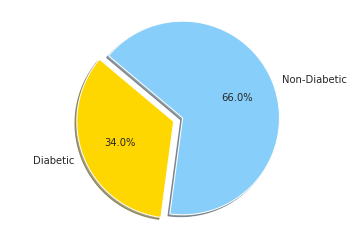

In [55]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Diabetic', 'Non-Diabetic'
sizes = [68, 132]
colors = ['gold','lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Let’s start by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

                NumPreg  PlasmaGlucose  ...  Pedigree       Age
NumPreg        1.000000       0.170525  ... -0.119473  0.598922
PlasmaGlucose  0.170525       1.000000  ...  0.060710  0.343407
DiastolicBP    0.252061       0.269381  ... -0.047400  0.391073
TricepSkin     0.109049       0.217597  ...  0.095403  0.251926
BodyMassIndex  0.058336       0.216790  ...  0.190551  0.131920
Pedigree      -0.119473       0.060710  ...  1.000000 -0.071410
Age            0.598922       0.343407  ... -0.071410  1.000000

[7 rows x 7 columns]


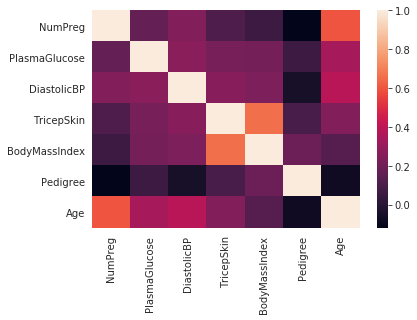

In [56]:
corr = diabetes_data.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

# Dataset Preparation (splitting and normalization)

In [0]:
for column in diabetes_data.columns:
    if diabetes_data[column].dtype == type(object):
        le = LabelEncoder()
        diabetes_data[column] = le.fit_transform(diabetes_data[column])

In [0]:
# print(len(diabetes_data[diabetes_data['Diabetic']=='Yes']))
# print(len(diabetes_data[diabetes_data['Diabetic']=='No']))

In [0]:
feature_columns = ['NumPreg','PlasmaGlucose','DiastolicBP','TricepSkin','BodyMassIndex','Pedigree','Age']
# diabetes_data[feature_columns] = diabetes_data[feature_columns].apply(lambda x: (x-x.min())/(x.ma)-x.min()))
diabetes_data[feature_columns] = (diabetes_data[feature_columns] - diabetes_data[feature_columns].mean())/diabetes_data[feature_columns].std()

In [60]:
#After Normalization the data
print(diabetes_data.head(5))

    NumPreg  PlasmaGlucose  DiastolicBP  ...  Pedigree       Age  Diabetic
0  0.424803      -1.199031    -0.283982  ... -0.314965 -0.738923         0
1  1.018933       2.243013    -0.109760  ... -0.969209  2.085566         1
2  0.424803      -1.483237     0.935572  ... -0.991993  0.263315         0
3 -1.060522       1.295661     0.412906  ... -0.656734 -0.556698         0
4 -1.060522      -0.535885    -0.980870  ... -1.066857 -0.830035         0

[5 rows x 8 columns]


# 1.Develop the best model to predict the categorical response variable "Diabetic" in case of the given dataset? Justify your choice for best model.

## Training and Evaluating Logistic Regression Model

Accuracy:  0.7580645161290323
Recall:  0.5217391304347826
Precision:  0.75
Confusion-Matrix: 
 [[35  4]
 [11 12]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


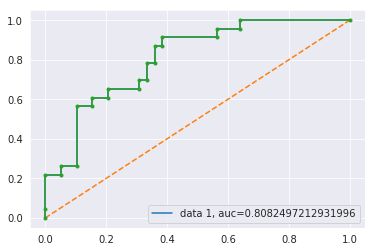

In [61]:
X = diabetes_data[feature_columns]
Y = diabetes_data['Diabetic']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.31, random_state = 0)

log_regress = LogisticRegression()
log_regress.fit(X_train, Y_train)

Y_pred = log_regress.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))
print("Recall: ",metrics.recall_score(Y_test, Y_pred))
print("Precision: ",metrics.precision_score(Y_test, Y_pred))
print("Confusion-Matrix: \n",metrics.confusion_matrix(Y_test, Y_pred))


Y_pred_proba = log_regress.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()


In [62]:
print(metrics.classification_report(Y_test, Y_pred, target_names=['Non-Diabetic','Diabetic']))

              precision    recall  f1-score   support

Non-Diabetic       0.76      0.90      0.82        39
    Diabetic       0.75      0.52      0.62        23

    accuracy                           0.76        62
   macro avg       0.76      0.71      0.72        62
weighted avg       0.76      0.76      0.75        62



 # Precision-Recall Curve

## Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

## Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes. Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1).

f1=0.615 auc=0.710 ap=0.718


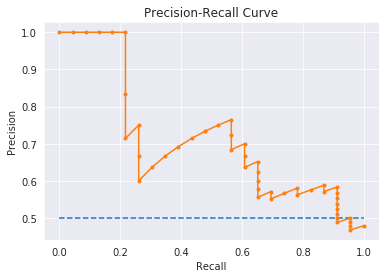

In [63]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = log_regress.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = log_regress.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, probs)
# calculate F1 score
f1 = f1_score(Y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(Y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
# show the plot
plt.show()

## Interpreting the LR Model

[ 0.57948419  1.16920735 -0.10024967 -0.09058184  0.57592427  0.527143
  0.08951769]


Text(0.5, 0, 'Importance')

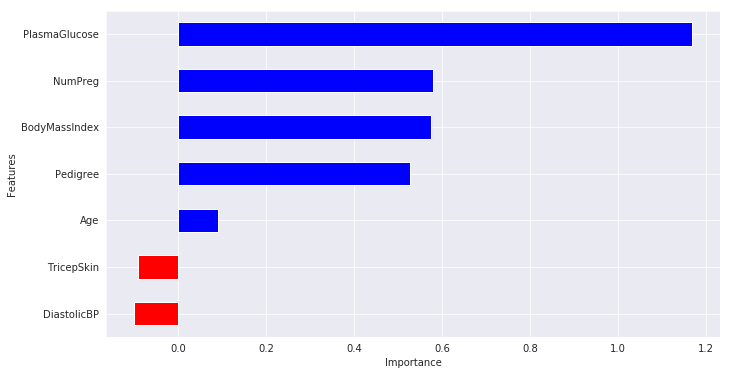

In [64]:
coeff = list(log_regress.coef_[0])
print(log_regress.coef_[0])
labels = list(X.columns)

features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## For the first part, with the help of ROC-curve and Precision-Recall curve, we took the best fit for the Logistic Regression Model. It was tested for different train-test splits and split giving the best accuracy was chosen.

# 2.Suppose you have chosen a threshold t to classify P(Diabetic | X) > t as "Diabetic" = Yes. How would you choose the optimal threshold t such that the aforesaid classification achieves maximum accuracy for your best model? Justify your choice.

In [0]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

X_test_arr = X_test.values.tolist()
coeff = list(log_regress.coef_[0])
bias = log_regress.intercept_[0]
output_Y = [bias+np.dot(data, coeff) for data in X_test_arr]
prob = [sigmoid(x) for x in output_Y]
# df = pd.DataFrame({'prob': prob})

In [0]:
def Threshold():
    thr = [0.01*i for i in range(0,101)]
    accuracy_thr = []
    for t in thr:
        Y_pred = [x>t for x in prob]
        accuracy_thr.append(metrics.accuracy_score(Y_test, Y_pred))
    # print(accuracy_thr)
    return accuracy_thr,thr
    
accuracy_thr,thr = Threshold()    

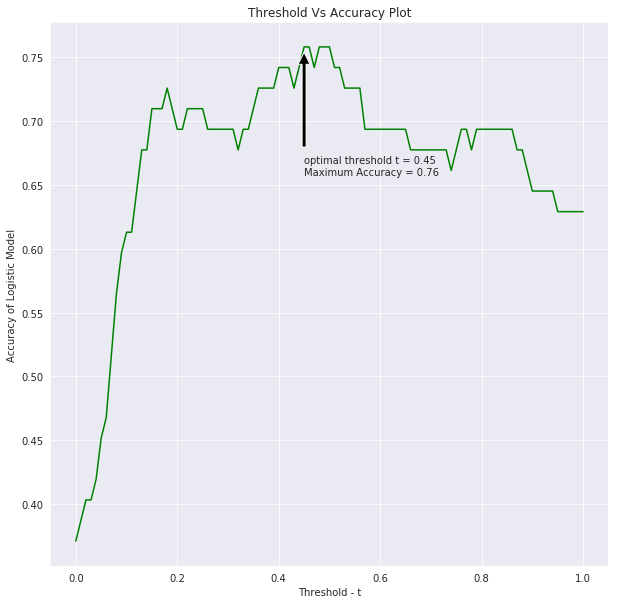

In [67]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

sns.set_style("darkgrid")
line, = ax.plot(thr,accuracy_thr, color='g')

ymax = max(accuracy_thr)
xpos = accuracy_thr.index(ymax)
xmax = thr[xpos]

ax.annotate('optimal threshold t = {0}\nMaximum Accuracy = {1}'.format(xmax,round(ymax,2)), xy=(xmax, ymax), xytext=(xmax, ymax-0.10),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.title("Threshold Vs Accuracy Plot")
plt.xlabel("Threshold - t")
plt.ylabel("Accuracy of Logistic Model")

plt.show()

## For the second part, we examined the accuracies for different values of t with a gap of 0.01 and plotted a graph of Accuracy vs Threshold(t) to choose the optimal value of threshold for maximum accuracy classification.

